# Specific arguments for particular field geometry

The openPMD format supports 3 types of geometries:
- Cartesian 2D
- Cartesian 3D
- Cylindrical with azimuthal decomposition (thetaMode)

This notebook shows how to use the arguments of `get_field` which are specific to a given geometry.

## (optional) Preparing this notebook to run it locally

If you choose to run this notebook on your local machine, you will need to download the openPMD data files which will then be visualized. To do so, execute the following cell. (Downloading the data may take a few seconds.)

In [1]:
import os, sys, tarfile, wget

def download_if_absent( dataset_name ):
    "Function that downloads and decompress a chosen dataset"
    if os.path.exists( dataset_name ) is False:
        tar_name = "%s.tar.gz" %dataset_name
        url = "https://github.com/openPMD/openPMD-example-datasets/raw/draft/%s" %tar_name
        wget.download(url, tar_name)
        with tarfile.open( tar_name ) as tar_file:
            tar_file.extractall()
        os.remove( tar_name )

download_if_absent( 'example-3d' )
download_if_absent( 'example-thetaMode' )

In addition, we choose here to incorporate the plots inside the notebook.

In [2]:
%matplotlib inline

## Preparing the API

Again, we need to import the `OpenPMDTimeSeries` object:

In [3]:
from opmd_viewer import OpenPMDTimeSeries

and to create objects that point to the 3D data and the cylindrical data. 

(NB: The argument `check_all_files` below is optional. By default, `check_all_files` is `True`, and in this case the code checks that all files in the timeseries are consistent
i.e. that they all contain the same fields and particle quantities, with the same metadata. When `check_all_files` is `False`, these verifications are skipped, and this allows to create the `OpenPMDTimeSeries` object faster.)

In [4]:
ts_3d = OpenPMDTimeSeries('./example-3d/hdf5/', check_all_files=False )
ts_circ = OpenPMDTimeSeries('./example-thetaMode/hdf5/', check_all_files=False )

## 3D Cartesian geometry

For 3D Cartesian geometry, the `get_field` method has additional arguments, in order to select a 2D slice into the 3D volume:
- `slicing_dir` allows to choose the axis across which the slice is taken. See the examples below:

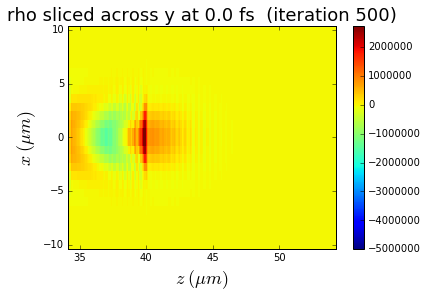

In [5]:
# Slice across y (i.e. in a plane parallel to x-z)
rho1, info_rho1 = ts_3d.get_field( field='rho', iteration=500, vmin=-5e6,
                                             slicing_dir='y', plot=True )

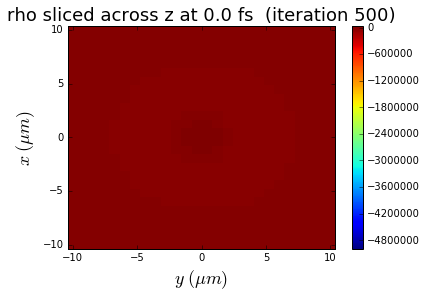

In [6]:
# Slice across z (i.e. in a plane parallel to x-y)
rho2, info_rho2 = ts_3d.get_field( field='rho', iteration=500, vmin=-5e6,
                                             slicing_dir='z', plot=True )

- For one given slicing direction, `slicing` allows to select which slice to take: `slicing` is a number between -1 and 1, where -1 indicates to take the slice at the lower bound of the slicing range (e.g. $z_min$ if `slicing_dir` is `z`) and 1 indicates to take the slice at the upper bound of the slicing range (e.g.  $z_max$ if `slicing_dir` is `z`). For example:

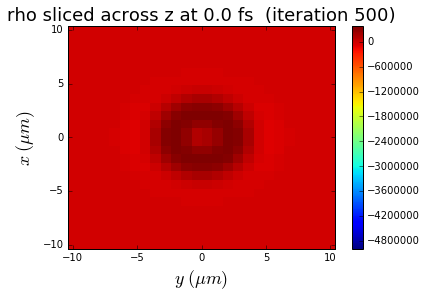

In [7]:
# Slice across z, very close to zmin.
rho2, info_rho2 = ts_3d.get_field( field='rho', iteration=500, vmin=-5e6,
                                slicing_dir='z', slicing=-0.9, plot=True )

## Cylindrical geometry (with azimuthal decomposition)

In for data in the `thetaMode` geometry, the fields are decomposed into azimuthal modes. Thus, the `get_field` method has an argument `m`, which allows to select the mode:

- Choosing an integer value for selects a particular mode (for instance, here one can see a laser-wakefield, which is entirely contained in the mode 0)

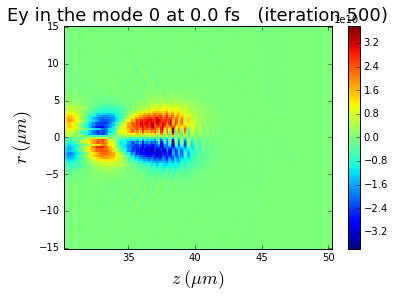

In [8]:
Ey, info_Ey = ts_circ.get_field( field='E', coord='y', iteration=500, m=0, 
                              plot=True, theta=0.5)

- Choosing `m='all'` sums all the modes (for instance, here the laser field, which is in the mode 1, dominates the fields)

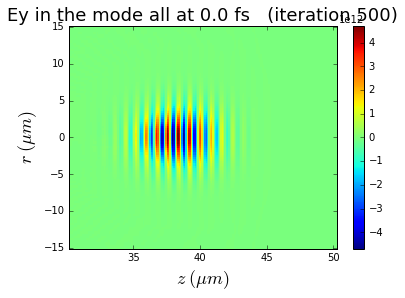

In [9]:
Ey, info_Ey = ts_circ.get_field( field='E', coord='y', iteration=500, m='all', 
                              plot=True, theta=0.5)

The argument `theta` (in radians) selects the plane of observation: this plane contains the $z$ axis and has an angle `theta` with respect to the $x$ axis.

In addition, in cylindrical geometry, the users can also choose the coordinates `r` and `t` for the radial and azimuthal components of the fields. For instance:

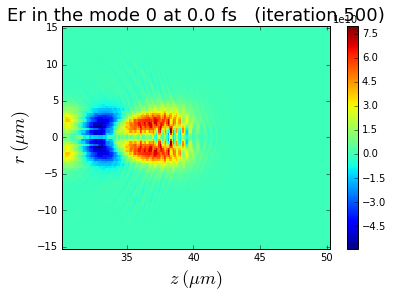

In [10]:
Er, info_Er = ts_circ.get_field( field='E', coord='r', iteration=500, m=0, 
                              plot=True, theta=0.5)